# Image Processing - Homework #2
## Restoration of Gaussian Blurring Image
    1. Inverse Filter
    2. High Pass Filter
    3. Unsharp Mask

## METHOD #1. Inverse Filter

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display
%matplotlib inline

### Original Image

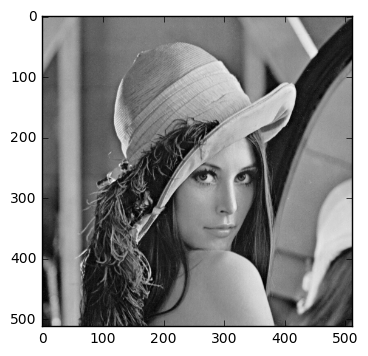

In [2]:
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

### Create Gaussian Filter

In [3]:
Gaussian_1Dfilter = cv2.getGaussianKernel(ksize=11, sigma=1)
Gaussian_2Dfilter = Gaussian_1Dfilter * Gaussian_1Dfilter.T

### Original Image & Gaussian Filter => FFT

In [4]:
trans_img = np.fft.fft2(img)
trans_gf = np.fft.fft2(Gaussian_2Dfilter, [512,512])

### Original Image * Gaussian Filter => Blurred Image in Frequency domain

In [5]:
trans_blur_img = trans_img * trans_gf

### Blurred Image

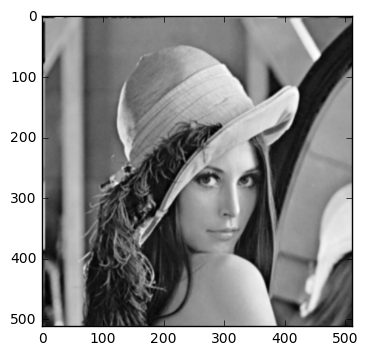

In [6]:
blur_img = abs(np.fft.ifft2(trans_blur_img))
plt.imshow(blur_img, cmap='gray')

### Similarity of original image & blurred image

In [7]:
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_psnr as psnr
from skimage.measure import compare_mse as mse
print(ssim(img, blur_img.astype('uint8')))
print(psnr(img, blur_img.astype('uint8')))
print(mse(img, blur_img.astype('uint8')))

0.525976676773
18.7150039471
874.137931824


### Create Inverse Filter

In [8]:
inv_trans_gf = 1. / trans_gf

### Blurred image * Inverse filter => Restored image in Frequency domain

In [9]:
trans_restored_img = trans_blur_img * inv_trans_gf

### Restored Image

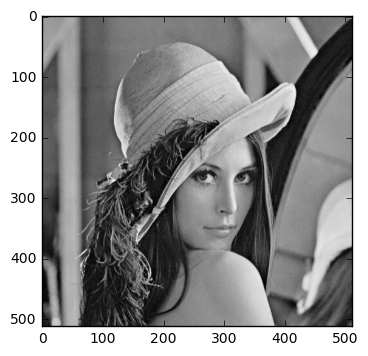

In [10]:
restored_img = abs(np.fft.ifft2(trans_restored_img))
plt.imshow(restored_img, cmap='gray')

### Similarity of original image & restored image

In [11]:
print(ssim(img, restored_img.astype('uint8')))
print(psnr(img, restored_img.astype('uint8')))
print(mse(img, restored_img.astype('uint8')))

0.99873157905
52.5698426057
0.359828948975


## METHOD #2. High Pass Filtering(HPF)

In [12]:
HPF = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [18]:
HPF_img = cv2.filter2D(src=blur_img, kernel=HPF, ddepth=cv2.CV_64F)

0.491471820987
18.0518533224
1018.34521866


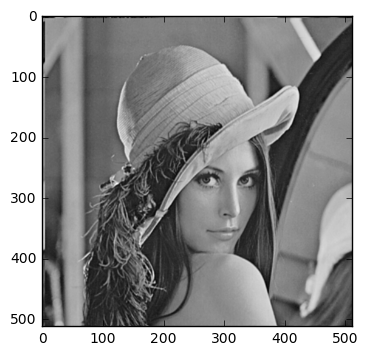

In [19]:
plt.imshow(HPF_img, cmap='gray')
print(ssim(img, HPF_img.astype('uint8')))
print(psnr(img, HPF_img.astype('uint8')))
print(mse(img, HPF_img.astype('uint8')))

## METHOD #3. Unsharp Mask

In [20]:
unsharp_mask = cv2.GaussianBlur(img, ksize=(11,11), sigmaX=1)
unsharp_mask = cv2.addWeighted(img, 1.5, unsharp_mask, -0.5, 0)

0.987015900482
40.167947073
6.25584030151


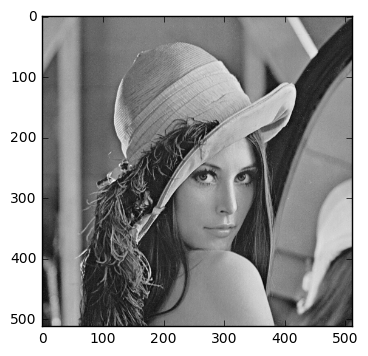

In [21]:
plt.imshow(unsharp_mask, cmap='gray')
print(ssim(img, unsharp_mask.astype('uint8')))
print(psnr(img, unsharp_mask.astype('uint8')))
print(mse(img, unsharp_mask.astype('uint8')))